In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, nsolve

In [2]:
from matplotlib.colors import LogNorm
from matplotlib import rcParams

In [3]:
from wrapper import solve_numeric

In [4]:
from wrapper import EQ1, EQ2, EQ3, EQ4

Define symbols for two codon model

In [5]:
Tt1, Tt2, Tc1, Tc2, Rb1, Rb2, fopt = symbols('Tt1 Tt2 Tc1 Tc2 Rb1 Rb2 fopt')
Rt, Rb, Tt, Tc, N, L, Ksp, Kbd, Kch = symbols('Rt Rb Tt Tc N L Ksp Kbd Kch')

In [6]:
EQ1 # ribosome on-off rate equilibrium

Eq(Kbd*N*(-Rb1 - Rb2 + Rt), Ksp*(Rb1*Tc1 + Rb2*Tc2)/L)

In [7]:
EQ2 # ribosome flux between codons

Eq(Rb1*Tc1*(1 - fopt), Rb2*Tc2*fopt)

In [8]:
EQ3 # charging-uncharging for tRNA 1

Eq(Kch*(-Tc1 + Tt1), Ksp*Rb1*Tc1)

In [9]:
EQ4 # charging-uncharging for tRNA 2

Eq(Kch*(-Tc2 + Tt2), Ksp*Rb2*Tc2)

In [6]:
# conversion for kbd used by Pinetree simulations
# necessary to make simulations agree with numeric solutions
def rbs_conversion(rbs):
    AVOGADRO = 6.02214076e23
    VOLUME = 8e-16
    return round(rbs / (AVOGADRO * VOLUME), 10)

### Solve with 50:50 tRNA ratio 

In [8]:
#RBS_STRENGTH = rbs_conversion(30000000)
fixed_params = {N: 5000,
       #Kbd: 0.005,
       Kbd: 0.0001,
       #Kch: 10,
       Rt: 25000,
       Tt1: 62500,
       Tt2: 62500,
       #Ksp: 0.02,
       Ksp: 0.0004,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_05 = solve_numeric(fixed_params, Kch, vals, name="kch", solver="muller", guess=(15000, 15000, 15000, 15000))

{N: 5000, Kbd: 0.0001, Rt: 25000, Tt1: 62500, Tt2: 62500, Ksp: 0.0004, L: 300, Kch: 3}
{N: 5000, Kbd: 0.0001, Rt: 25000, Tt1: 62500, Tt2: 62500, Ksp: 0.0004, L: 300, Kch: 10}
{N: 5000, Kbd: 0.0001, Rt: 25000, Tt1: 62500, Tt2: 62500, Ksp: 0.0004, L: 300, Kch: 30}
{N: 5000, Kbd: 0.0001, Rt: 25000, Tt1: 62500, Tt2: 62500, Ksp: 0.0004, L: 300, Kch: 100}
{N: 5000, Kbd: 0.0001, Rt: 25000, Tt1: 62500, Tt2: 62500, Ksp: 0.0004, L: 300, Kch: 300}


In [9]:
# normalize colorscale values for plotting on log scale
norm = LogNorm(vmin=vals[0], vmax=vals[-1]) 

In [10]:
df_05["protein_expr_rate"] = df_05["protein"] / 100

In [11]:
df_05["Rf"] = 25000 - df_05["Rb"]

In [12]:
L_codons = 300
# formula for calculating the ave. ribosome speed in codons / s
df_05["codons_per_second"] = (df_05["protein_expr_rate"] * L_codons) / df_05["Rb"]

In [13]:
# formula for the ribosome density per 100 nucleotides
df_05["ribo_per_100_nt"] = (df_05["Rb"] / 5000) / 9

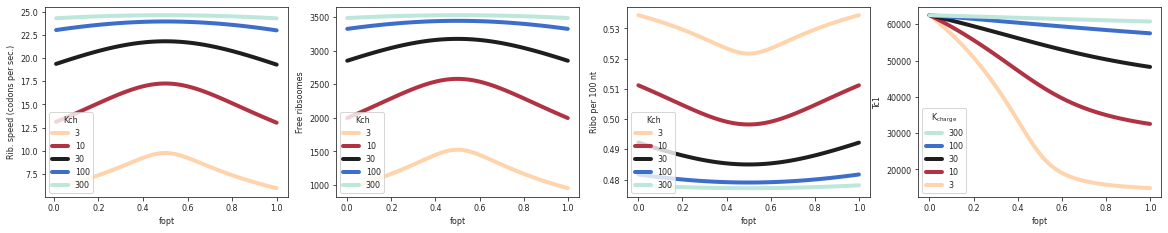

In [16]:
rcParams['figure.figsize'] = [20, 3.5]
fig, ax = plt.subplots(1, 4)

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="codons_per_second", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[0]
                 )
g1.set_ylabel("Rib. speed (codons per sec.)")
g1.legend(title="Kch", loc="lower left")

g2 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="Rf", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[1]
                 )
g2.set_ylabel("Free ribsoomes")
g2.legend(title="Kch", loc="lower left")

g3 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="ribo_per_100_nt", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette, 
                 linewidth=4,
                 ax=ax[2]
                 )
g3.set_ylabel("Ribo per 100 nt")
g3.legend(title="Kch", loc="lower left")

g4 = sns.lineplot(data=df_05, 
                  x="fopt", 
                  y="tc1", 
                  hue="kch", 
                  hue_norm=norm, 
                  palette=palette, 
                  linewidth=4,
                 ax=ax[3])
g4.set_ylabel("Tc1")
g4.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

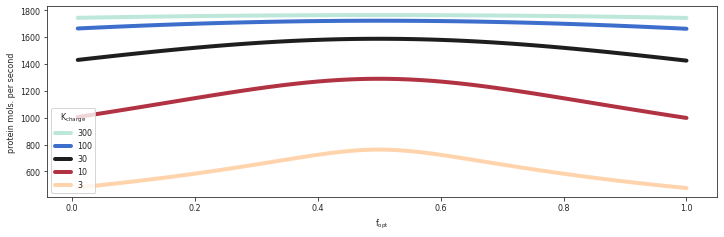

In [15]:
plt.rcParams['figure.figsize'] = [12, 3.5]
plt.rcParams["text.usetex"] = False
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

g1 = sns.lineplot(data=df_05, 
                 x="fopt", 
                 y="protein_expr_rate", 
                 hue="kch", 
                 hue_norm=norm, 
                 palette=palette,
                 linewidth=4)
g1.set_xlabel(r"$f_{opt}$")
g1.set_ylabel("protein mols. per second")
g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)

In [88]:
df_05[(df_05.kch == 30)].mean()

fopt                    0.500000
rb1                   219.450311
rb2                   219.450311
tc1                  1097.251557
tc2                  1097.251557
kch                    30.000000
tu1                   152.748443
tu2                   152.748443
protein              3057.018784
Rb                    438.900623
Tc                   2194.503114
protein_expr_rate      30.570188
Rf                     61.099377
codons_per_second      20.901004
ribo_per_100_nt         0.487667
dtype: float64

### Solve with 55:45, 70:30 and 90:10 tRNA ratios

In [63]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1750,
       Tt2: 750,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_07 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1750, Tt2: 750, Ksp: 0.02, L: 300, Kch: 300}


In [64]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 2250,
       Tt2: 250,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_09 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 2250, Tt2: 250, Ksp: 0.02, L: 300, Kch: 300}


In [65]:
#RBS_STRENGTH = rbs_conversion(30000000)
params = {N: 100,
       Kbd: 0.005,
#       Kch: 10,
       Rt: 500,
       Tt1: 1375,
       Tt2: 1125,
       Ksp: 0.02,
       L: 300}

vals = [3, 10, 30, 100, 300]
df_55 = solve_numeric(params, Kch, vals, name="kch") 

{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 3}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 10}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 30}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 100}
{N: 100, Kbd: 0.005, Rt: 500, Tt1: 1375, Tt2: 1125, Ksp: 0.02, L: 300, Kch: 300}


In [66]:
df_07["trna_prop"] = 0.7
df_09["trna_prop"] = 0.9
df_55["trna_prop"] = 0.55

In [67]:
df_07["protein_expr_rate"] = df_07["protein"] / 100
df_09["protein_expr_rate"] = df_09["protein"] / 100
df_55["protein_expr_rate"] = df_55["protein"] / 100

In [68]:
df_07["Rf"] = 500 - df_07["Rb"]
df_09["Rf"] = 500 - df_09["Rb"]
df_55["Rf"] = 500 - df_55["Rb"]

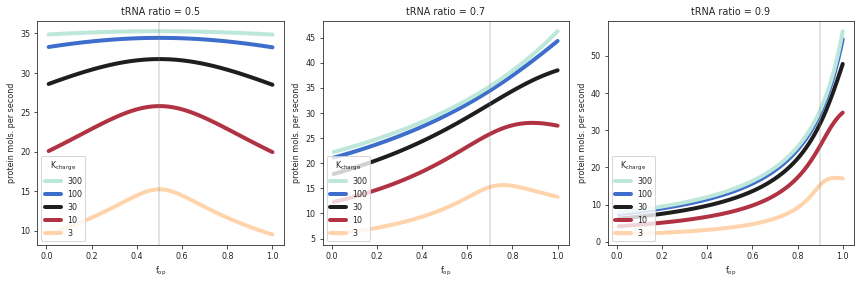

In [70]:
fig, ax = plt.subplots(1, 3) #figsize=(24, 6)

plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams["text.usetex"] = False
#plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = "8"
plt.rcParams["mathtext.default"] = "regular"

sns.set_style("ticks")

palette = sns.color_palette("icefire_r", as_cmap=True)

idx = 0
for df, label in zip([df_05, df_07, df_09], [0.5, 0.7, 0.9]):
    g1 = sns.lineplot(data=df, 
                     x="fopt", 
                     y="protein_expr_rate", 
                     hue="kch", 
                     hue_norm=norm, 
                     palette=palette,
                     linewidth=4,
                     ax=ax[idx])
    g1.set_xlabel(r"$f_{op}$")
    #g1.set_ylim(0, 110)
    g1.set_ylabel("protein mols. per second")
    g1.set_title(f"tRNA ratio = {label}")
    g1.legend(title=r"$K_{charge}$", loc="lower left", reverse=True)
    g1.axvline(label, alpha=0.3, color="grey")
    idx += 1

plt.tight_layout()
#plt.savefig("kch_3_300_midpoint_trna_05_07_09_numeric.png")